In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Sequential
import tensorflow.keras.preprocessing.image as p

In [3]:
dataGen = p.ImageDataGenerator( rescale= 1./255  )

In [4]:
trainGen = dataGen.flow_from_directory( 'myimg', target_size=(98,98) )

Found 20 images belonging to 2 classes.


In [6]:
x_train, y_train = trainGen.next()

In [7]:
x_train.shape

(20, 98, 98, 3)

In [8]:
y_train.shape

(20, 2)

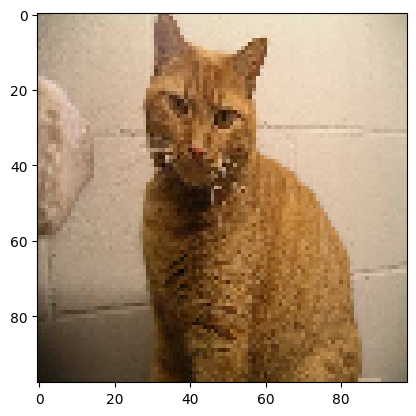

In [10]:
plt.imshow( x_train[0] )

In [11]:
y_train[0]

array([1., 0.], dtype=float32)

In [12]:
trainGen.class_indices

{'cat': 0, 'dog': 1}

In [18]:
model =Sequential()
model.add( Conv2D( 32, kernel_size=(3,3), strides=1, 
                  input_shape=(98,98,3), activation='relu', padding='same' ) )
model.add( Conv2D( 64, kernel_size=(3,3), activation='relu' ) )
model.add( MaxPool2D( pool_size=(2, 2) ) )
model.add( Flatten() )
model.add( Dense( units=64, activation='relu' ) )
model.add( Dense(units=2, activation='softmax') )
model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['acc']  )
# model.fit( x_train, x_train, epochs=10 )
model.fit( trainGen, epochs=50 )

Epoch 1/50
1/1 [==============================] - 1s 747ms/step - loss: 0.7258 - acc: 0.5000
Epoch 2/50
1/1 [==============================] - 0s 254ms/step - loss: 5.9483 - acc: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 247ms/step - loss: 0.6276 - acc: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 253ms/step - loss: 1.0944 - acc: 0.5000
Epoch 5/50
1/1 [==============================] - 0s 231ms/step - loss: 0.3271 - acc: 0.8500
Epoch 6/50
1/1 [==============================] - 0s 249ms/step - loss: 0.4042 - acc: 0.8000
Epoch 7/50
1/1 [==============================] - 0s 250ms/step - loss: 0.2303 - acc: 0.8500
Epoch 8/50
1/1 [==============================] - 0s 259ms/step - loss: 0.1905 - acc: 0.9500
Epoch 9/50
1/1 [==============================] - 0s 248ms/step - loss: 0.1351 - acc: 1.0000
Epoch 10/50
1/1 [==============================] - 0s 236ms/step - loss: 0.1172 - acc: 1.0000
Epoch 11/50
1/1 [==============================] - 0s 244ms/step - lo

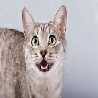

In [19]:
testImg = p.load_img('test.jpg',target_size=(98,98))
testImg

In [20]:
type(testImg )

PIL.Image.Image

In [22]:
imgArr = p.img_to_array( testImg )/255
imgArr

array([[[0.8       , 0.8117647 , 0.84705883],
        [0.8039216 , 0.8156863 , 0.8509804 ],
        [0.8039216 , 0.8156863 , 0.8509804 ],
        ...,
        [0.83137256, 0.84313726, 0.8784314 ],
        [0.8392157 , 0.8509804 , 0.8862745 ],
        [0.8392157 , 0.8509804 , 0.8862745 ]],

       [[0.8039216 , 0.8156863 , 0.8509804 ],
        [0.8039216 , 0.8156863 , 0.8509804 ],
        [0.8039216 , 0.8156863 , 0.8509804 ],
        ...,
        [0.8352941 , 0.84705883, 0.88235295],
        [0.8352941 , 0.84705883, 0.88235295],
        [0.827451  , 0.8392157 , 0.8745098 ]],

       [[0.80784315, 0.81960785, 0.85490197],
        [0.8039216 , 0.8156863 , 0.8509804 ],
        [0.8       , 0.8117647 , 0.84705883],
        ...,
        [0.8352941 , 0.84705883, 0.88235295],
        [0.827451  , 0.8392157 , 0.8745098 ],
        [0.81960785, 0.83137256, 0.8666667 ]],

       ...,

       [[0.57254905, 0.5254902 , 0.5254902 ],
        [0.6509804 , 0.6039216 , 0.6039216 ],
        [0.62352943, 0

In [23]:
imgArr.shape

(98, 98, 3)

In [25]:
model.predict( imgArr.reshape(1,98,98,3) ).argmax(axis=1)

1/1 [==============================] - 0s 25ms/step


array([0], dtype=int64)

In [ ]:
# 팀별과제: 호랑이, 사자 (이미지 크롤링 100 100)
# 케라스 cnn 학습하고 하나의 테스트 이미지가 주어진 경우 분류를 예측하시요.